In [1]:
import pandas as pd

In [3]:
import os
print(os.getcwd())


c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\notebooks


In [7]:
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

In [8]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, con)

print("Tables in the database:")
print(tables)

# Close the connection
con.close()

Tables in the database:
                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


In [9]:
#Issue 3
# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to compute average scores for BOS
query = """
SELECT 
    AVG(CASE WHEN team_abbreviation_home = 'BOS' THEN pts_home END) AS avg_home_score,
    AVG(CASE WHEN team_abbreviation_away = 'BOS' THEN pts_away END) AS avg_away_score
FROM game;
"""

# Execute the query
result = pd.read_sql_query(query, con)

# Print the results
print(f"Average score for BOS at home: {result['avg_home_score'][0]:.2f}")
print(f"Average score for BOS away: {result['avg_away_score'][0]:.2f}")

# Close the connection
con.close()

Average score for BOS at home: 106.28
Average score for BOS away: 102.25


In [10]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 6.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 9.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 8.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------- -

In [11]:
import matplotlib.pyplot as plt

Issue 4
Each group needs to agree on a business objective to solve and 5 analytical questions they want to answer. Try to make these questions as deep as possible. For example ""Does a substitution in the third quarter increase or decrease the odds of a victory?"" is far superior to ""how many substations happen in the third quarter on average?"". Try to outline a useful business objective to a team or league and 5 deep analytical questions that could help solve it.

1. Which draft pick rounds (or positions) have historically produced the most successful players based on career stats such as average points per game, assists, or minutes played?
2. What are the most significant factors contributing to a team's win margin: player efficiency, bench scoring, turnovers, or defensive stats?
3. Which teams demonstrate the highest player rotation efficiency by analyzing the relationship between bench points and total team points?
4. What player roles or positions (e.g., guard, forward, center) contribute the most to team success based on key performance metrics in wins vs. losses?
5. Is there a statistical relationship between three-point shot attempts and team success? Do teams relying heavily on three-pointers win more consistently?

In [14]:
import sqlite3
import pandas as pd

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

query = """
SELECT 
    d.round AS draft_round,
    AVG(p.points) AS avg_points,
    AVG(p.assists) AS avg_assists,
    AVG(p.minutes) AS avg_minutes
FROM draft_history d
JOIN common_player_info p ON d.player_id = p.player_id
WHERE p.points IS NOT NULL
GROUP BY d.round
ORDER BY avg_points DESC;

"""



In [19]:
query1 = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;

"""


In [22]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to analyze draft rounds
query_draft_summary = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;
"""

# Execute the query and load the result into a DataFrame
draft_summary = pd.read_sql_query(query_draft_summary, con)

# Display the results
print("Descriptive Statistics for Draft Rounds:")
print(draft_summary)

# Close the database connection
con.close()


Descriptive Statistics for Draft Rounds:
    round_number  total_players  avg_pick_position  min_pick_position  \
0              0            510           0.000000                  0   
1              1           1625          12.883077                  1   
2              2           1591          37.768699                  0   
3              3            574          43.470383                  0   
4              4            544          60.049632                  0   
5              5            543          76.952118                  0   
6              6            534          94.795880                  0   
7              7            524         112.104962                  0   
8              8            437         121.750572                  0   
9              9            387         136.206718                  0   
10            10            365         151.394521                  0   
11            11            146         122.308219                  0   
12        

In [25]:
query2 = """"
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;

"""

In [27]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate win margin
query_win_margin = """
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;
"""

# Execute the query and load the result into a DataFrame
win_margin_data = pd.read_sql_query(query_win_margin, con)

# Calculate descriptive statistics for win margin
win_margin_summary = win_margin_data['win_margin'].describe()

# Print the summary statistics
print("Descriptive Statistics for Win Margins:")
print(win_margin_summary)

# Close the database connection
con.close()


Descriptive Statistics for Win Margins:
count    58053.000000
mean         0.349026
std         13.628982
min        -73.000000
25%         -9.000000
50%          1.000000
75%          9.000000
max         68.000000
Name: win_margin, dtype: float64


In [28]:
query3 = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;

"""

In [29]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team scoring statistics
query_team_points = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;
"""

# Execute the query and load into DataFrame
team_points = pd.read_sql_query(query_team_points, con)

# Close the database connection
con.close()

# Calculate team efficiency (combining home and away points)
team_points['total_points'] = team_points['total_points_home'] + team_points['total_points_away']

# Display team efficiency summary
print("Team Scoring Efficiency:")
print(team_points.sort_values(by='total_points', ascending=False))


Team Scoring Efficiency:
   team  total_points_home  total_points_away  total_points
10  BOS           283400.0           275421.0      558821.0
65  NYK           264649.0           264745.0      529394.0
46  LAL           244325.0           237771.0      482096.0
24  DET           220447.0           221644.0      442091.0
72  PHX           219767.0           215989.0      435756.0
..  ...                ...                ...           ...
32  FLA               88.0              106.0         194.0
29  FBU               97.0               91.0         188.0
48  LRO               87.0               93.0         180.0
50  MEL               85.0               86.0         171.0
27  EPT               81.0               84.0         165.0

[103 rows x 4 columns]


In [30]:
query4 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;


"""

In [32]:
import pandas as pd
import sqlite3

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team-level wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)


Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


In [33]:
query5 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;

"""

Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


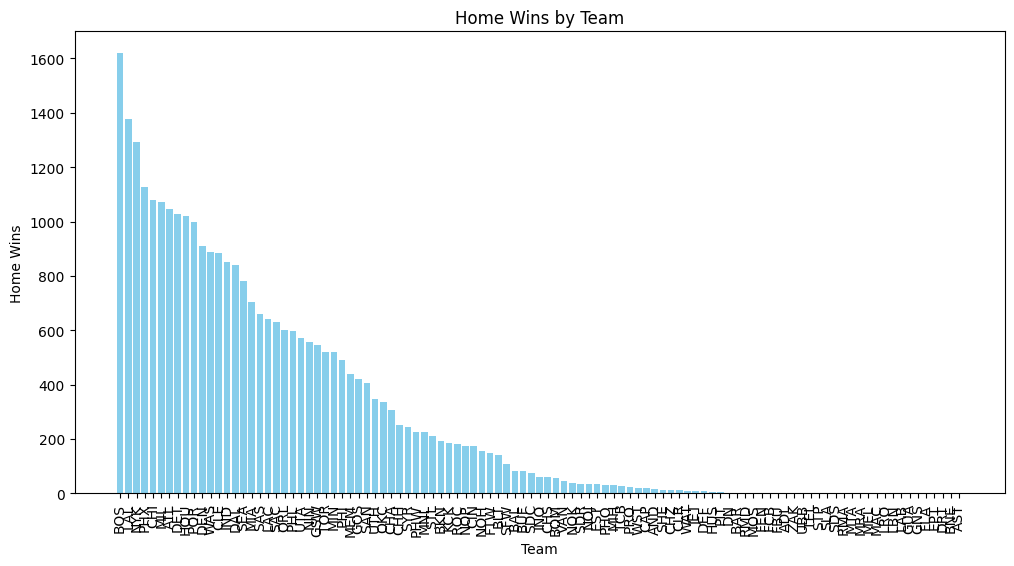

In [34]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)

# Optional: Visualization
import matplotlib.pyplot as plt

# Plot total home wins by team
plt.figure(figsize=(12, 6))
plt.bar(team_success['team'], team_success['home_wins'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Home Wins')
plt.title('Home Wins by Team')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
import os
print(os.getcwd())


c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\notebooks


In [ ]:
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, con)

print("Tables in the database:")
print(tables)

# Close the connection
con.close()

Tables in the database:
                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


In [ ]:
#Issue 3
# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to compute average scores for BOS
query = """
SELECT 
    AVG(CASE WHEN team_abbreviation_home = 'BOS' THEN pts_home END) AS avg_home_score,
    AVG(CASE WHEN team_abbreviation_away = 'BOS' THEN pts_away END) AS avg_away_score
FROM game;
"""

# Execute the query
result = pd.read_sql_query(query, con)

# Print the results
print(f"Average score for BOS at home: {result['avg_home_score'][0]:.2f}")
print(f"Average score for BOS away: {result['avg_away_score'][0]:.2f}")

# Close the connection
con.close()

Average score for BOS at home: 106.28
Average score for BOS away: 102.25


In [ ]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 6.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 9.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 8.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------- -

In [ ]:
import matplotlib.pyplot as plt

Issue 4
Each group needs to agree on a business objective to solve and 5 analytical questions they want to answer. Try to make these questions as deep as possible. For example ""Does a substitution in the third quarter increase or decrease the odds of a victory?"" is far superior to ""how many substations happen in the third quarter on average?"". Try to outline a useful business objective to a team or league and 5 deep analytical questions that could help solve it.

1. Which draft pick rounds (or positions) have historically produced the most successful players based on career stats such as average points per game, assists, or minutes played?
2. What are the most significant factors contributing to a team's win margin: player efficiency, bench scoring, turnovers, or defensive stats?
3. Which teams demonstrate the highest player rotation efficiency by analyzing the relationship between bench points and total team points?
4. What player roles or positions (e.g., guard, forward, center) contribute the most to team success based on key performance metrics in wins vs. losses?
5. Is there a statistical relationship between three-point shot attempts and team success? Do teams relying heavily on three-pointers win more consistently?

In [ ]:
import sqlite3
import pandas as pd

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

query = """
SELECT 
    d.round AS draft_round,
    AVG(p.points) AS avg_points,
    AVG(p.assists) AS avg_assists,
    AVG(p.minutes) AS avg_minutes
FROM draft_history d
JOIN common_player_info p ON d.player_id = p.player_id
WHERE p.points IS NOT NULL
GROUP BY d.round
ORDER BY avg_points DESC;

"""



In [ ]:
query1 = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;

"""


In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to analyze draft rounds
query_draft_summary = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;
"""

# Execute the query and load the result into a DataFrame
draft_summary = pd.read_sql_query(query_draft_summary, con)

# Display the results
print("Descriptive Statistics for Draft Rounds:")
print(draft_summary)

# Close the database connection
con.close()


Descriptive Statistics for Draft Rounds:
    round_number  total_players  avg_pick_position  min_pick_position  \
0              0            510           0.000000                  0   
1              1           1625          12.883077                  1   
2              2           1591          37.768699                  0   
3              3            574          43.470383                  0   
4              4            544          60.049632                  0   
5              5            543          76.952118                  0   
6              6            534          94.795880                  0   
7              7            524         112.104962                  0   
8              8            437         121.750572                  0   
9              9            387         136.206718                  0   
10            10            365         151.394521                  0   
11            11            146         122.308219                  0   
12        

In [ ]:
query2 = """"
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;

"""

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate win margin
query_win_margin = """
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;
"""

# Execute the query and load the result into a DataFrame
win_margin_data = pd.read_sql_query(query_win_margin, con)

# Calculate descriptive statistics for win margin
win_margin_summary = win_margin_data['win_margin'].describe()

# Print the summary statistics
print("Descriptive Statistics for Win Margins:")
print(win_margin_summary)

# Close the database connection
con.close()


Descriptive Statistics for Win Margins:
count    58053.000000
mean         0.349026
std         13.628982
min        -73.000000
25%         -9.000000
50%          1.000000
75%          9.000000
max         68.000000
Name: win_margin, dtype: float64


In [ ]:
query3 = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;

"""

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team scoring statistics
query_team_points = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;
"""

# Execute the query and load into DataFrame
team_points = pd.read_sql_query(query_team_points, con)

# Close the database connection
con.close()

# Calculate team efficiency (combining home and away points)
team_points['total_points'] = team_points['total_points_home'] + team_points['total_points_away']

# Display team efficiency summary
print("Team Scoring Efficiency:")
print(team_points.sort_values(by='total_points', ascending=False))


Team Scoring Efficiency:
   team  total_points_home  total_points_away  total_points
10  BOS           283400.0           275421.0      558821.0
65  NYK           264649.0           264745.0      529394.0
46  LAL           244325.0           237771.0      482096.0
24  DET           220447.0           221644.0      442091.0
72  PHX           219767.0           215989.0      435756.0
..  ...                ...                ...           ...
32  FLA               88.0              106.0         194.0
29  FBU               97.0               91.0         188.0
48  LRO               87.0               93.0         180.0
50  MEL               85.0               86.0         171.0
27  EPT               81.0               84.0         165.0

[103 rows x 4 columns]


In [ ]:
query4 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;


"""

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team-level wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)


Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


In [ ]:
query5 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;

"""

Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


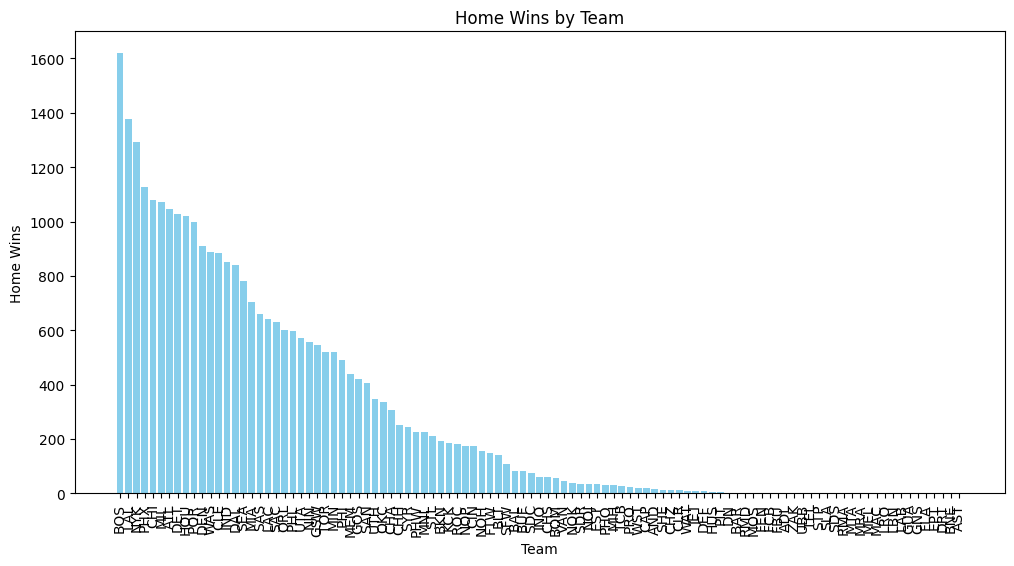

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)

# Optional: Visualization
import matplotlib.pyplot as plt

# Plot total home wins by team
plt.figure(figsize=(12, 6))
plt.bar(team_success['team'], team_success['home_wins'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Home Wins')
plt.title('Home Wins by Team')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import os
print(os.getcwd())


c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\notebooks


In [ ]:
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, con)

print("Tables in the database:")
print(tables)

# Close the connection
con.close()

Tables in the database:
                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


In [ ]:
#Issue 3
# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# Query to compute average scores for BOS
query = """
SELECT 
    AVG(CASE WHEN team_abbreviation_home = 'BOS' THEN pts_home END) AS avg_home_score,
    AVG(CASE WHEN team_abbreviation_away = 'BOS' THEN pts_away END) AS avg_away_score
FROM game;
"""

# Execute the query
result = pd.read_sql_query(query, con)

# Print the results
print(f"Average score for BOS at home: {result['avg_home_score'][0]:.2f}")
print(f"Average score for BOS away: {result['avg_away_score'][0]:.2f}")

# Close the connection
con.close()

Average score for BOS at home: 106.28
Average score for BOS away: 102.25


In [ ]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 6.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 9.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 8.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------- -

In [ ]:
import matplotlib.pyplot as plt

Issue 4
Each group needs to agree on a business objective to solve and 5 analytical questions they want to answer. Try to make these questions as deep as possible. For example ""Does a substitution in the third quarter increase or decrease the odds of a victory?"" is far superior to ""how many substations happen in the third quarter on average?"". Try to outline a useful business objective to a team or league and 5 deep analytical questions that could help solve it.

1. Which draft pick rounds (or positions) have historically produced the most successful players based on career stats such as average points per game, assists, or minutes played?
2. What are the most significant factors contributing to a team's win margin: player efficiency, bench scoring, turnovers, or defensive stats?
3. Which teams demonstrate the highest player rotation efficiency by analyzing the relationship between bench points and total team points?
4. What player roles or positions (e.g., guard, forward, center) contribute the most to team success based on key performance metrics in wins vs. losses?
5. Is there a statistical relationship between three-point shot attempts and team success? Do teams relying heavily on three-pointers win more consistently?

In [ ]:
import sqlite3
import pandas as pd

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

query = """
SELECT 
    d.round AS draft_round,
    AVG(p.points) AS avg_points,
    AVG(p.assists) AS avg_assists,
    AVG(p.minutes) AS avg_minutes
FROM draft_history d
JOIN common_player_info p ON d.player_id = p.player_id
WHERE p.points IS NOT NULL
GROUP BY d.round
ORDER BY avg_points DESC;

"""



In [ ]:
query1 = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;

"""


In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to analyze draft rounds
query_draft_summary = """
SELECT 
    round_number, 
    COUNT(*) AS total_players,
    AVG(overall_pick) AS avg_pick_position,
    MIN(overall_pick) AS min_pick_position,
    MAX(overall_pick) AS max_pick_position
FROM 
    draft_history
GROUP BY 
    round_number
ORDER BY 
    round_number;
"""

# Execute the query and load the result into a DataFrame
draft_summary = pd.read_sql_query(query_draft_summary, con)

# Display the results
print("Descriptive Statistics for Draft Rounds:")
print(draft_summary)

# Close the database connection
con.close()


Descriptive Statistics for Draft Rounds:
    round_number  total_players  avg_pick_position  min_pick_position  \
0              0            510           0.000000                  0   
1              1           1625          12.883077                  1   
2              2           1591          37.768699                  0   
3              3            574          43.470383                  0   
4              4            544          60.049632                  0   
5              5            543          76.952118                  0   
6              6            534          94.795880                  0   
7              7            524         112.104962                  0   
8              8            437         121.750572                  0   
9              9            387         136.206718                  0   
10            10            365         151.394521                  0   
11            11            146         122.308219                  0   
12        

In [ ]:
query2 = """"
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;

"""

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate win margin
query_win_margin = """
SELECT 
    game_id,
    pts_home,
    pts_away,
    (pts_home - pts_away) AS win_margin
FROM 
    line_score
WHERE 
    pts_home IS NOT NULL 
    AND pts_away IS NOT NULL;
"""

# Execute the query and load the result into a DataFrame
win_margin_data = pd.read_sql_query(query_win_margin, con)

# Calculate descriptive statistics for win margin
win_margin_summary = win_margin_data['win_margin'].describe()

# Print the summary statistics
print("Descriptive Statistics for Win Margins:")
print(win_margin_summary)

# Close the database connection
con.close()


Descriptive Statistics for Win Margins:
count    58053.000000
mean         0.349026
std         13.628982
min        -73.000000
25%         -9.000000
50%          1.000000
75%          9.000000
max         68.000000
Name: win_margin, dtype: float64


In [ ]:
query3 = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;

"""

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team scoring statistics
query_team_points = """
SELECT 
    team_abbreviation_home AS team, 
    SUM(pts_home) AS total_points_home,
    SUM(pts_away) AS total_points_away
FROM 
    line_score
GROUP BY 
    team_abbreviation_home;
"""

# Execute the query and load into DataFrame
team_points = pd.read_sql_query(query_team_points, con)

# Close the database connection
con.close()

# Calculate team efficiency (combining home and away points)
team_points['total_points'] = team_points['total_points_home'] + team_points['total_points_away']

# Display team efficiency summary
print("Team Scoring Efficiency:")
print(team_points.sort_values(by='total_points', ascending=False))


Team Scoring Efficiency:
   team  total_points_home  total_points_away  total_points
10  BOS           283400.0           275421.0      558821.0
65  NYK           264649.0           264745.0      529394.0
46  LAL           244325.0           237771.0      482096.0
24  DET           220447.0           221644.0      442091.0
72  PHX           219767.0           215989.0      435756.0
..  ...                ...                ...           ...
32  FLA               88.0              106.0         194.0
29  FBU               97.0               91.0         188.0
48  LRO               87.0               93.0         180.0
50  MEL               85.0               86.0         171.0
27  EPT               81.0               84.0         165.0

[103 rows x 4 columns]


In [ ]:
query4 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;


"""

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team-level wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)


Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


In [ ]:
query5 = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;

"""

Team Success Analysis (Wins, Losses, and Points):
    team  home_wins  home_losses  total_home_points  total_away_points
0    BOS       1618         1091           283400.0           275421.0
1    LAL       1377          895           244325.0           237771.0
2    NYK       1294         1332           264649.0           264745.0
3    PHX       1127          914           219767.0           215989.0
4    CHI       1080          989           211734.0           209945.0
..   ...        ...          ...                ...                ...
98   FLA          0            1               88.0              106.0
99   EPT          0            1               81.0               84.0
100  DRT          0            2              310.0              333.0
101  BNE          0            1               93.0              114.0
102  AST          0            2              328.0              356.0

[103 rows x 5 columns]


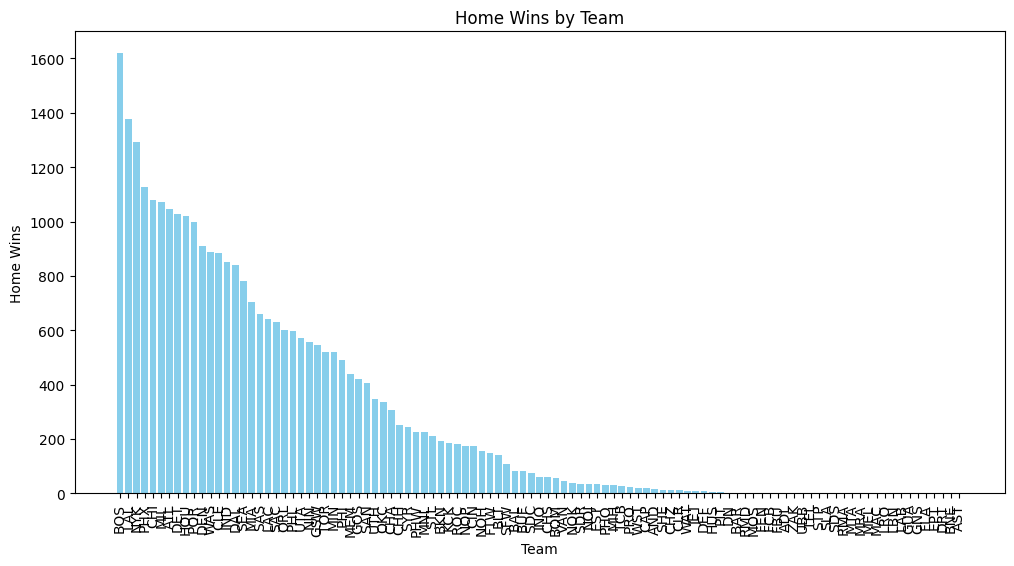

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect(r'c:\Users\aarus\OneDrive\Documents\UMD-INST627-Fall2024\data\nba.sqlite')

# SQL query to calculate team wins, losses, and points
query_team_success = """
SELECT 
    team_abbreviation_home AS team,
    SUM(CASE WHEN pts_home > pts_away THEN 1 ELSE 0 END) AS home_wins,
    SUM(CASE WHEN pts_home < pts_away THEN 1 ELSE 0 END) AS home_losses,
    SUM(pts_home) AS total_home_points,
    SUM(pts_away) AS total_away_points
FROM 
    line_score
GROUP BY 
    team_abbreviation_home
ORDER BY 
    home_wins DESC;
"""

# Execute the query and load the result into a DataFrame
team_success = pd.read_sql_query(query_team_success, con)

# Close the database connection
con.close()

# Display the result
print("Team Success Analysis (Wins, Losses, and Points):")
print(team_success)

# Optional: Visualization
import matplotlib.pyplot as plt

# Plot total home wins by team
plt.figure(figsize=(12, 6))
plt.bar(team_success['team'], team_success['home_wins'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Home Wins')
plt.title('Home Wins by Team')
plt.xticks(rotation=90)
plt.show()
